In [1]:
import os
import sys
import pandas as pd
import numpy as np
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import variable_encode as var_encode
from sklearn.metrics import confusion_matrix,recall_score, auc, roc_curve,precision_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
import warnings
warnings.filterwarnings("ignore") ##忽略警告

# 读取数据

In [2]:
data_train_1 = pd.read_excel('最终2018年改变分箱最后19个特征数据的分箱.xlsx')
data_test_1 = pd.read_excel('最终2019年-1改变分箱最后19个特征数据的分箱.xlsx')
data_test_2 = pd.read_excel('最终2019年-2改变分箱最后19个特征数据的分箱.xlsx')
data_test_3 = pd.read_excel('最终2019年-3改变分箱最后19个特征数据的分箱.xlsx')
data_test_4 = pd.read_excel('最终2019年-4改变分箱最后19个特征数据的分箱.xlsx')

In [3]:
data_train_1 = data_train_1.drop(columns = ['mths_since_recent_inq'])
data_test_1 = data_test_1.drop(columns = ['mths_since_recent_inq'])
data_test_2 = data_test_2.drop(columns = ['mths_since_recent_inq'])
data_test_3 = data_test_3.drop(columns = ['mths_since_recent_inq'])
data_test_4 = data_test_4.drop(columns = ['mths_since_recent_inq'])

In [4]:
    ####取出训练数据与测试数据
var_all = list(data_train_1.columns)
var_all.remove('loan_status')

In [5]:
scaler = StandardScaler().fit(data_train_1[var_all])
data_train_1[var_all] = scaler.transform(data_train_1[var_all])  
data_test_1[var_all] = scaler.transform(data_test_1[var_all])

x_train = np.array(data_train_1[var_all])
y_train = np.array(data_train_1.loan_status)
    
x_test_1 = np.array(data_test_1[var_all])
y_test_1 = np.array(data_test_1.loan_status)

x_test_2 = np.array(data_test_2[var_all])
y_test_2 = np.array(data_test_2.loan_status)

x_test_3 = np.array(data_test_3[var_all])
y_test_3 = np.array(data_test_3.loan_status)

x_test_4 = np.array(data_test_4[var_all])
y_test_4 = np.array(data_test_4.loan_status)

In [6]:
y_test_1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# 模型训练

## 设置待优化的超参数

In [7]:
xgb_param = {'max_depth': list(range(2, 6, 1)), 'min_child_weight': list(range(1, 4, 1)),
                 'learning_rate': list(np.arange(0.01, 0.3, 0.01)), 'scale_pos_weight': list(range(1, 5, 1))}

## 初始化网格搜索

In [8]:
xgb_gsearch = GridSearchCV(
        estimator=XGBClassifier(random_state=0, n_estimators=500, subsample=0.8, colsample_bytree=0.8),
        param_grid=xgb_param, cv=3, scoring='f1', n_jobs=-1, verbose=2)

## 执行超参数优化

In [9]:
#xgb_gsearch.fit(x_train, y_train)
#print('xgboost model best_score_ is {0},and best_params_ is {1}'.format(xgb_gsearch.best_score_,
 #                                                                         xgb_gsearch.best_params_))

In [10]:
#Fitting 3 folds for each of 288 candidates, totalling 864 fits
#[23:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
#xgboost model best_score_ is 0.4856610796362695,and best_params_ is {'learning_rate': 0.060000000000000005, 'max_depth': 3, 'min_child_weight': 1, 'scale_pos_weight': 3}

## 训练模型

In [11]:
xgboost_model = XGBClassifier(random_state=0, n_jobs=-1,
                                    n_estimators=280,
                                    max_depth=3,
                                    subsample=0.8, colsample_bytree=0.8,
                                    learning_rate=0.28,
                                    scale_pos_weight=1)

In [12]:
xgboost_model_fit = xgboost_model.fit(x_train, y_train)

[08:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## 模型预测

In [13]:
y_pred = xgboost_model_fit.predict(x_train)
y_proba = xgboost_model_fit.predict_proba(x_train)

In [14]:
y_pred_1 = xgboost_model_fit.predict(x_test_1)
y_proba_1 = xgboost_model_fit.predict_proba(x_test_1)
y_pred_2 = xgboost_model_fit.predict(x_test_2)
y_proba_2 = xgboost_model_fit.predict_proba(x_test_2)
y_pred_3 = xgboost_model_fit.predict(x_test_3)
y_proba_3 = xgboost_model_fit.predict_proba(x_test_3)
y_pred_4 = xgboost_model_fit.predict(x_test_4)
y_proba_4 = xgboost_model_fit.predict_proba(x_test_4)

# 模型评估

## 混淆矩阵

### 训练集混淆矩阵

In [15]:
cnf_matrix = confusion_matrix(y_train,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix

预测为好   预测为坏
标签为好  187346   7357
标签为坏   54774  10672

### 测试集混淆矩阵

In [16]:
cnf_matrix_1 = confusion_matrix(y_test_1,y_pred_1)
cnf_matrix_1 = pd.DataFrame(cnf_matrix_1,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix_1

预测为好  预测为坏
标签为好  23464   753
标签为坏   8220  1182

In [17]:
cnf_matrix_2= confusion_matrix(y_test_2,y_pred_2)
cnf_matrix_2 = pd.DataFrame(cnf_matrix_2,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix_2

预测为好  预测为坏
标签为好  23769   356
标签为坏   8945   525

In [18]:
cnf_matrix_3 = confusion_matrix(y_test_3,y_pred_3)
cnf_matrix_3 = pd.DataFrame(cnf_matrix_3,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix_3

预测为好  预测为坏
标签为好  24166   382
标签为坏   8767   477

In [19]:
cnf_matrix_4 = confusion_matrix(y_test_4,y_pred_4)
cnf_matrix_4 = pd.DataFrame(cnf_matrix_4,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix_4

预测为好  预测为坏
标签为好  23803   355
标签为坏   8908   475

## 评估指标

### 训练集

In [20]:
acc_xgboost = accuracy_score(y_train,y_pred)
kappa_xgboost = cohen_kappa_score(y_train,y_pred)
auc_xgboost = roc_auc_score(y_train, y_proba[:,1])
fpr_xgboost, tpr_xgboost, thresholds_roc_xgboost= roc_curve(y_train,y_proba[:,1])
ks_xgboost = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_xgboost, fpr_xgboost)])
results = pd.DataFrame()
results['准确率'] = [acc_xgboost]
results['AUC'] = [auc_xgboost]
results['KS值'] = [ks_xgboost]
results['kappa'] = [kappa_xgboost]
results.index = ['XGBoost']
results

准确率       AUC       KS值     kappa
XGBoost  0.761171  0.720061  0.318227  0.164949

### 测试集1-2-3-4

In [21]:
acc_xgboost = accuracy_score(y_test_1,y_pred_1)
kappa_xgboost = cohen_kappa_score(y_test_1,y_pred_1)
auc_xgboost = roc_auc_score(y_test_1, y_proba_1[:,1])
fpr_xgboost, tpr_xgboost, thresholds_roc_xgboost= roc_curve(y_test_1,y_proba_1[:,1])
ks_xgboost = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_xgboost, fpr_xgboost)])
results1 = pd.DataFrame()
results1['准确率_1'] = [acc_xgboost]
results1['AUC_1'] = [auc_xgboost]
results1['KS值_1'] = [ks_xgboost]
results1['kappa_1'] = [kappa_xgboost]
results1.index = ['XGBoost']
results1

准确率_1     AUC_1     KS值_1   kappa_1
XGBoost  0.733097  0.705251  0.300104  0.124987

In [22]:
acc_xgboost = accuracy_score(y_test_2,y_pred_2)
kappa_xgboost = cohen_kappa_score(y_test_2,y_pred_2)
auc_xgboost = roc_auc_score(y_test_2, y_proba_2[:,1])
fpr_xgboost, tpr_xgboost, thresholds_roc_xgboost= roc_curve(y_test_2,y_proba_2[:,1])
ks_xgboost = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_xgboost, fpr_xgboost)])
results2 = pd.DataFrame()
results2['准确率_2'] = [acc_xgboost]
results2['AUC_2'] = [auc_xgboost]
results2['KS值_2'] = [ks_xgboost]
results2['kappa_2'] = [kappa_xgboost]
results2.index = ['XGBoost']
results2

准确率_2     AUC_2     KS值_2   kappa_2
XGBoost  0.723143  0.652823  0.220279  0.056149

In [23]:
acc_xgboost = accuracy_score(y_test_3,y_pred_3)
kappa_xgboost = cohen_kappa_score(y_test_3,y_pred_3)
auc_xgboost = roc_auc_score(y_test_3, y_proba_3[:,1])
fpr_xgboost, tpr_xgboost, thresholds_roc_xgboost= roc_curve(y_test_3,y_proba_3[:,1])
ks_xgboost = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_xgboost, fpr_xgboost)])
results3 = pd.DataFrame()
results3['准确率_3'] = [acc_xgboost]
results3['AUC_3'] = [auc_xgboost]
results3['KS值_3'] = [ks_xgboost]
results3['kappa_3'] = [kappa_xgboost]
results3.index = ['XGBoost']
results3

准确率_3     AUC_3     KS值_3   kappa_3
XGBoost  0.729255  0.652598  0.218172  0.050247

In [24]:
acc_xgboost = accuracy_score(y_test_4,y_pred_4)
kappa_xgboost = cohen_kappa_score(y_test_4,y_pred_4)
auc_xgboost = roc_auc_score(y_test_4, y_proba_4[:,1])
fpr_xgboost, tpr_xgboost, thresholds_roc_xgboost= roc_curve(y_test_4,y_proba_4[:,1])
ks_xgboost = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_xgboost, fpr_xgboost)])
results4 = pd.DataFrame()
results4['准确率_4'] = [acc_xgboost]
results4['AUC_4'] = [auc_xgboost]
results4['KS值_4'] = [ks_xgboost]
results4['kappa_4'] = [kappa_xgboost]
results4.index = ['XGBoost']
results4

准确率_4     AUC_4    KS值_4   kappa_4
XGBoost  0.723831  0.651344  0.22189  0.049814

In [25]:
acc1=[results1['准确率_1'],results2['准确率_2'],results3['准确率_3'],results4['准确率_4']]
ac1=np.mean(acc1)
bc1=np.std(acc1)

In [26]:
acc2=[results1['AUC_1'],results2['AUC_2'],results3['AUC_3'],results4['AUC_4']]
ac2=np.mean(acc2)
bc2=np.std(acc2)

In [27]:
acc3=[results1['KS值_1'],results2['KS值_2'],results3['KS值_3'],results4['KS值_4']]
ac3=np.mean(acc3)
bc3=np.std(acc3)

In [28]:
acc4=[results1['kappa_1'],results2['kappa_2'],results3['kappa_3'],results4['kappa_4']]
ac4=np.mean(acc4)
bc4=np.std(acc4)

### 测试集

In [29]:
results11 =pd.DataFrame({'准确率的均值':{'XGBoost':ac1},'准确率的方差':{'XGBoost':bc1},
                   'AUC的均值':{'XGBoost':ac2},'KS值的均值':{'XGBoost':ac3},
                   'kappa的均值':{'XGBoost':ac4}})
results11

准确率的均值    准确率的方差    AUC的均值    KS值的均值  kappa的均值
XGBoost  0.727332  0.004085  0.665504  0.240111  0.070299

## ROC和KS曲线

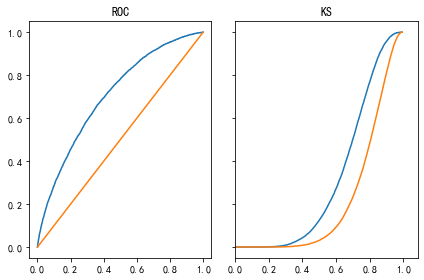

In [30]:
y_proba_xgboost_1= y_proba_1
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr,tpr,thresholds = roc_curve(y_test_1,y_proba_xgboost_1[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

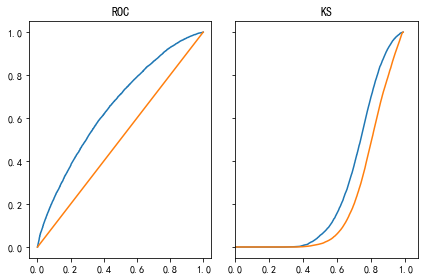

In [31]:
y_proba_xgboost_2= y_proba_2
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_2))):
    fpr,tpr,thresholds = roc_curve(y_test_2,y_proba_xgboost_2[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

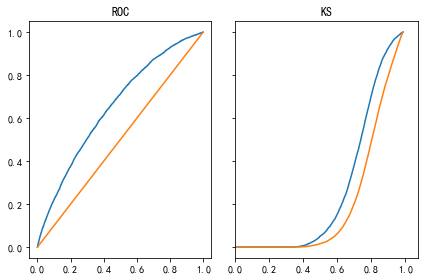

In [32]:
y_proba_xgboost_3= y_proba_3
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_3))):
    fpr,tpr,thresholds = roc_curve(y_test_3,y_proba_xgboost_3[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

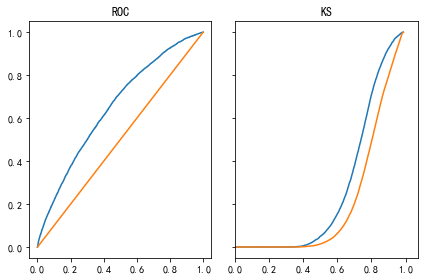

In [33]:
y_proba_xgboost_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_4))):
    fpr,tpr,thresholds = roc_curve(y_test_4,y_proba_xgboost_4[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

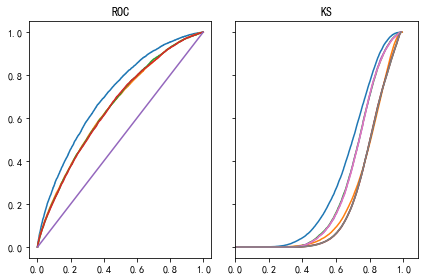

In [34]:
y_proba_xgboost_1= y_proba_1
y_proba_xgboost_2= y_proba_2
y_proba_xgboost_3= y_proba_3
y_proba_xgboost_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr_1,tpr_1,thresholds_1 = roc_curve(y_test_1,y_proba_xgboost_1[:,i],pos_label = i)
for i in range(len(np.unique(y_test_2))):
    fpr_2,tpr_2,thresholds_2 = roc_curve(y_test_2,y_proba_xgboost_2[:,i],pos_label = i)
for i in range(len(np.unique(y_test_3))):
    fpr_3,tpr_3,thresholds_3 = roc_curve(y_test_3,y_proba_xgboost_3[:,i],pos_label = i)
for i in range(len(np.unique(y_test_4))):
    fpr_4,tpr_4,thresholds_4 = roc_curve(y_test_4,y_proba_xgboost_4[:,i],pos_label = i)    
axe1.plot(fpr_1,tpr_1)
axe1.plot(fpr_2,tpr_2)
axe1.plot(fpr_3,tpr_3)
axe1.plot(fpr_4,tpr_4)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds_1,tpr_1,label = 'TPR')
axe2.plot(1 - thresholds_1,fpr_1,label = 'FPR')
axe2.plot(1 - thresholds_2,tpr_2,label = 'TPR')
axe2.plot(1 - thresholds_2,fpr_2,label = 'FPR')
axe2.plot(1 - thresholds_3,tpr_3,label = 'TPR')
axe2.plot(1 - thresholds_3,fpr_3,label = 'FPR')
axe2.plot(1 - thresholds_4,tpr_4,label = 'TPR')
axe2.plot(1 - thresholds_4,fpr_4,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

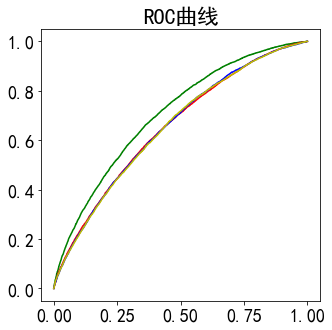

In [35]:
import matplotlib.font_manager as fm
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('ROC曲线')
plt.plot(fpr_1,tpr_1,color='g',label="ROC_1")
plt.plot(fpr_2,tpr_2,color='r',label="ROC_2")
plt.plot(fpr_3,tpr_3,color='b',label="ROC_3")
plt.plot(fpr_4,tpr_4,color='y',label="ROC_4")
plt.show()

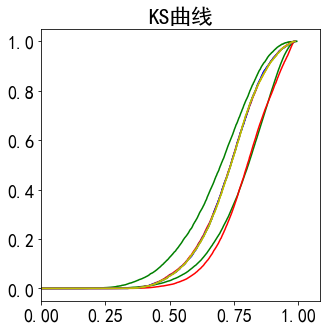

In [36]:
import matplotlib.font_manager as fm
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('KS曲线')
plt.plot(1 - thresholds_1,tpr_1,color='g',label='TPR')
plt.plot(1 - thresholds_1,fpr_1,color='g',label='FPR')
plt.plot(1 - thresholds_2,tpr_2,color='r',label='TPR')
plt.plot(1 - thresholds_2,fpr_2,color='r',label='FPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='TPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='FPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='TPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='FPR')
plt.xlim(0,)
plt.show()

# 模型验证

## 5折交叉检验

In [37]:
#ef muti_score(model):
warnings.filterwarnings('ignore')
accuracy = cross_val_score(xgboost_model, x_train, y_train, scoring='accuracy', cv=5)
acc_mean=accuracy.mean()
acc_std=accuracy.std()
results = pd.DataFrame()
results["准确率均值"] = [acc_mean]
results["准确率标准差"] = [acc_std]
results.index = ['xgboost']
results
#rint("准确率均值",accuracy.mean())
#rint("准确率方差",accuracy.var())

[08:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

准确率均值    准确率标准差
xgboost  0.758485  0.000797

# 模型PSI的计算

In [38]:
def cal_psi(actual, predict, bins=10):
    actual_min = actual.min()  # 实际中的最小概率
    actual_max = actual.max()  # 实际中的最大概率
    binlen = (actual_max - actual_min) / bins
    cuts = [actual_min + i * binlen for i in range(1, bins)]#设定分组
    cuts.insert(0, -float("inf"))
    cuts.append(float("inf"))
    actual_cuts = np.histogram(actual, bins=cuts)#将actual等宽分箱
    predict_cuts = np.histogram(predict, bins=cuts)#将predict按actual的分组等宽分箱
    actual_df = pd.DataFrame(actual_cuts[0],columns=['actual'])
    predict_df = pd.DataFrame(predict_cuts[0], columns=['predict'])
    psi_df = pd.merge(actual_df,predict_df,right_index=True,left_index=True)
    psi_df['actual_rate'] = (psi_df['actual'] + 1) / psi_df['actual'].sum()#计算占比，分子加1，防止计算PSI时分子分母为0
    psi_df['predict_rate'] = (psi_df['predict'] + 1) / psi_df['predict'].sum()
    psi_df['psi'] = (psi_df['actual_rate'] - psi_df['predict_rate']) * np.log(
        psi_df['actual_rate'] / psi_df['predict_rate'])
    psi = psi_df['psi'].sum()
    return psi, psi_df

In [39]:
psi_values11=cal_psi(y_proba[:,1], y_proba_1[:,1],10)
psi_values11

(0.0036686896121680616,
    actual  predict  actual_rate  predict_rate       psi
 0   32040     4284     0.123164      0.127458  0.000147
 1   63586     8440     0.244425      0.251078  0.000179
 2   61332     8107     0.235761      0.241173  0.000123
 3   45251     5944     0.173946      0.176835  0.000048
 4   28427     3539     0.109276      0.105298  0.000148
 5   16222     1929     0.062360      0.057408  0.000410
 6    8285      900     0.031851      0.026800  0.000872
 7    3710      377     0.014265      0.011244  0.000719
 8    1181       89     0.004544      0.002677  0.000987
 9     115       10     0.000446      0.000327  0.000037)

In [40]:
psi_values12=cal_psi(y_proba[:,1], y_proba_2[:,1],10)
psi_values12

(0.09068244126536731,
    actual  predict  actual_rate  predict_rate       psi
 0   32040     4918     0.123164      0.146421  0.004023
 1   63586     7916     0.244425      0.235660  0.000320
 2   61332     9431     0.235761      0.280756  0.007859
 3   45251     6377     0.173946      0.189850  0.001391
 4   28427     3187     0.109276      0.094895  0.002029
 5   16222     1225     0.062360      0.036494  0.013859
 6    8285      491     0.031851      0.014645  0.013368
 7    3710       48     0.014265      0.001459  0.029203
 8    1181        2     0.004544      0.000089  0.017503
 9     115        0     0.000446      0.000030  0.001126)

In [41]:
psi_values13=cal_psi(y_proba[:,1], y_proba_3[:,1],10)
psi_values13

(0.1013683402701576,
    actual  predict  actual_rate  predict_rate       psi
 0   32040     5033     0.123164      0.148970  0.004909
 1   63586     7958     0.244425      0.235529  0.000330
 2   61332     9464     0.235761      0.280096  0.007639
 3   45251     6458     0.173946      0.191140  0.001621
 4   28427     3116     0.109276      0.092241  0.002887
 5   16222     1255     0.062360      0.037169  0.013036
 6    8285      468     0.031851      0.013879  0.014929
 7    3710       40     0.014265      0.001213  0.032165
 8    1181        0     0.004544      0.000030  0.022723
 9     115        0     0.000446      0.000030  0.001129)

In [42]:
psi_values14=cal_psi(y_proba[:,1], y_proba_4[:,1],10)
psi_values14

(0.10021927372310642,
    actual  predict  actual_rate  predict_rate       psi
 0   32040     5045     0.123164      0.150443  0.005458
 1   63586     7838     0.244425      0.233714  0.000480
 2   61332     9325     0.235761      0.278048  0.006976
 3   45251     6472     0.173946      0.192988  0.001978
 4   28427     3112     0.109276      0.092812  0.002689
 5   16222     1263     0.062360      0.037685  0.012428
 6    8285      440     0.031851      0.013148  0.016548
 7    3710       46     0.014265      0.001401  0.029849
 8    1181        0     0.004544      0.000030  0.022688
 9     115        0     0.000446      0.000030  0.001126)

In [43]:
bcc2=[psi_values11[0],psi_values12[0],psi_values13[0],psi_values14[0]]
bbc2=np.mean(bcc2)
bbc2

0.07398468621769985

In [44]:
results111 =pd.DataFrame({'PSI':{'XGBoost':bbc2},'PSI_1':{'XGBoost':psi_values11[0]},'PSI_2':{'XGBoost':psi_values12[0]},
                   'PSI_3':{'XGBoost':psi_values13[0]},'PSI_4':{'XGBoost':psi_values14[0]}})
results111

PSI     PSI_1     PSI_2     PSI_3     PSI_4
XGBoost  0.073985  0.003669  0.090682  0.101368  0.100219